# Setup


## Instalando biblioteca


In [1]:
%pip install -U scikit-fuzzy
%pip install pyswarm


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Utilitários


In [2]:
import skfuzzy as fuzz
import pandas as pd

class ResultadoSimulacao:
    def __init__(self, rotulo, valor, pertinencias):
        self.rotulo = rotulo
        self.valor = valor
        self.pertinencias = pertinencias

    def ver(self):
        print(f"Nivel de risco: {self.valor:.2f}\n")

        for label, p in self.pertinencias.items():
            print(f"Pertinância de '{label}': {p:.2f}")

        print(f"Risco {self.rotulo}")
    

def interpretar_resultado(valor_risco, universo, mostrar=True):
    pertinencias = {}
    
    for label in universo.terms:
        pertinencias[label] = fuzz.interp_membership(universo.universe, universo[label].mf, valor_risco)

    mais_pertinente, _ = max(pertinencias.items(), key=lambda x: x[1])       

    return ResultadoSimulacao(mais_pertinente, valor_risco, pertinencias)

# Exemplo da biblioteca


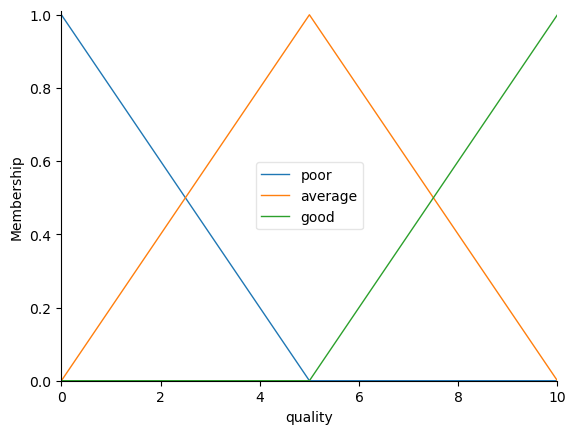

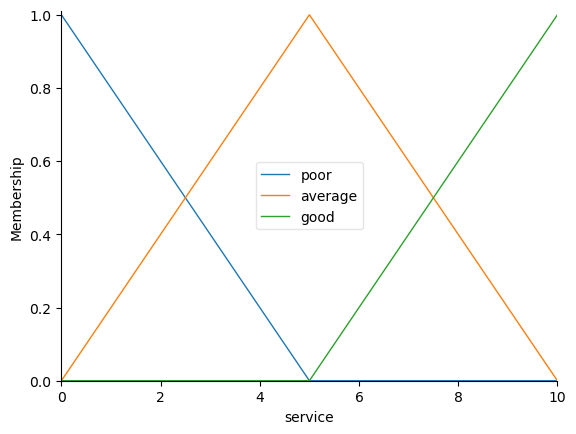

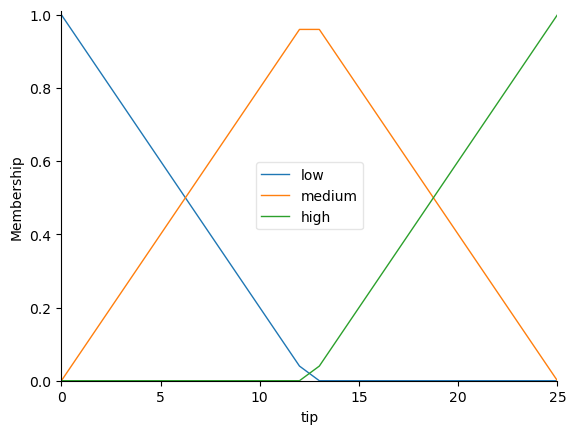

In [46]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), "quality")
service = ctrl.Antecedent(np.arange(0, 11, 1), "service")
tip = ctrl.Consequent(np.arange(0, 26, 1), "tip")

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)
tip.automf(names= ["low", "medium", "high"])



quality.view()
service.view()
tip.view()

In [47]:
rule1 = ctrl.Rule(quality["poor"] | service["poor"], tip["low"])
rule2 = ctrl.Rule(service["average"], tip["medium"])
rule3 = ctrl.Rule(service["good"] | quality["good"], tip["high"])

Defuzzified value: 12.499999999999996

Membership of 'low': 0.020000000000000143
Membership of 'medium': 0.96
Membership of 'high': 0.019999999999999858


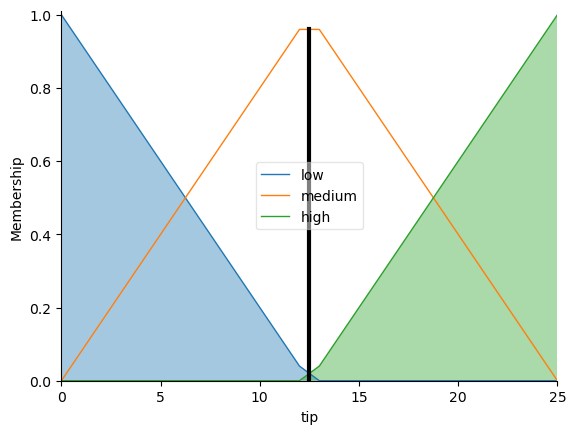

In [50]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input["quality"] = "poor"
tipping.input["service"] = "good"

tip.defuzzify_method = "centroid"

# Crunch the numbers
tipping.compute()

print(f"Defuzzified value: {tipping.output['tip']}\n")
for label in tip.terms:
    membership_value = fuzz.interp_membership(tip.universe, tip[label].mf, tipping.output["tip"])
    print(f"Membership of '{label}': {membership_value}")

tip.view(sim=tipping)

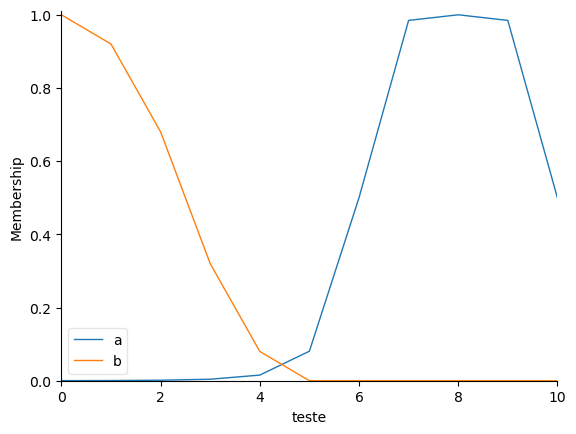

In [7]:
teste = ctrl.Antecedent(np.arange(0, 11, 1), "teste")
u = teste.universe
teste["a"] = fuzz.gbellmf(u, 2, 3, 8)
teste["b"] = fuzz.zmf(u, 0, 5)
# teste["c"] = fuzz.trimf(u, [5, 10, 10])
# teste["d"] = fuzz.trimf(u, [0, 10, 10])
# teste["f"] = fuzz.trimf(u, [0, 0, 0])
teste.view()

# Exercício: Matriz de Risco


## Inferência com regras

### 1: Modelo básico

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

# Criar as variáveis fuzzy
severity = ctrl.Antecedent(np.arange(0, 6, 1), 'severity')
probability = ctrl.Antecedent(np.arange(0, 6, 1), 'probability')
risk = ctrl.Consequent(np.arange(0, 2, 1), 'risk')

# Definir funções de pertinência para severidade
severity['negligenciavel'] = fuzz.trimf(severity.universe, [0, 1, 2])
severity['baixo'] = fuzz.trimf(severity.universe, [1, 2, 3])
severity['moderado'] = fuzz.trimf(severity.universe, [2, 3, 4])
severity['significativo'] = fuzz.trimf(severity.universe, [3, 4, 5])
severity['catastrofico'] = fuzz.trimf(severity.universe, [4, 5, 5])

# Definir funções de pertinência para probabilidade
probability['improvavel'] = fuzz.trimf(probability.universe, [0, 1, 2])
probability['remoto'] = fuzz.trimf(probability.universe, [1, 2, 3])
probability['ocasional'] = fuzz.trimf(probability.universe, [2, 3, 4])
probability['provavel'] = fuzz.trimf(probability.universe, [3, 4, 5])
probability['frequente'] = fuzz.trimf(probability.universe, [4, 5, 5])

# Definir funções de pertinência para risco (apenas aceitável ou inaceitável)
risk['aceitavel'] = fuzz.trimf(risk.universe, [0, 0, 0.5])
risk['inaceitavel'] = fuzz.trimf(risk.universe, [0.5, 1, 1])

# Definir regras baseadas na matriz de risco
rules = [
    # Regras para risco inaceitável (células laranjas)
    ctrl.Rule(severity['catastrofico'] & probability['remoto'], risk['inaceitavel']),
    ctrl.Rule(severity['catastrofico'] & probability['ocasional'], risk['inaceitavel']),
    ctrl.Rule(severity['catastrofico'] & probability['provavel'], risk['inaceitavel']),
    ctrl.Rule(severity['catastrofico'] & probability['frequente'], risk['inaceitavel']),

    ctrl.Rule(severity['significativo'] & probability['remoto'], risk['inaceitavel']),
    ctrl.Rule(severity['significativo'] & probability['ocasional'], risk['inaceitavel']),
    ctrl.Rule(severity['significativo'] & probability['provavel'], risk['inaceitavel']),
    ctrl.Rule(severity['significativo'] & probability['frequente'], risk['inaceitavel']),
    
    ctrl.Rule(severity['moderado'] & probability['ocasional'], risk['inaceitavel']),
    ctrl.Rule(severity['moderado'] & probability['provavel'], risk['inaceitavel']),
    ctrl.Rule(severity['moderado'] & probability['frequente'], risk['inaceitavel']),
    
    # Regras para risco aceitável (células brancas)
    ctrl.Rule(severity['negligenciavel'] & probability['improvavel'], risk['aceitavel']),
    ctrl.Rule(severity['negligenciavel'] & probability['remoto'], risk['aceitavel']),
    ctrl.Rule(severity['negligenciavel'] & probability['ocasional'], risk['aceitavel']),
    ctrl.Rule(severity['negligenciavel'] & probability['provavel'], risk['aceitavel']),
    ctrl.Rule(severity['negligenciavel'] & probability['frequente'], risk['aceitavel']),
    
    ctrl.Rule(severity['baixo'] & probability['improvavel'], risk['aceitavel']),
    ctrl.Rule(severity['baixo'] & probability['remoto'], risk['aceitavel']),
    ctrl.Rule(severity['baixo'] & probability['ocasional'], risk['aceitavel']),
    ctrl.Rule(severity['baixo'] & probability['provavel'], risk['aceitavel']),
    ctrl.Rule(severity['baixo'] & probability['frequente'], risk['aceitavel']),
    
    ctrl.Rule(severity['moderado'] & probability['improvavel'], risk['aceitavel']),
    ctrl.Rule(severity['moderado'] & probability['remoto'], risk['aceitavel']),
    
    ctrl.Rule(severity['significativo'] & probability['improvavel'], risk['aceitavel']),
    
    ctrl.Rule(severity['catastrofico'] & probability['improvavel'], risk['aceitavel'])
]

# Criar e simular o sistema de controle fuzzy
risco_controle = ctrl.ControlSystem(rules)
risco_simulacao = ctrl.ControlSystemSimulation(risco_controle)

def calculate_risk(sev_value, prob_value):
    """
    Calcula o risco baseado nos valores de severidade e probabilidade
    
    Args:
        sev_value (float): Valor da severidade (1-5)
        prob_value (float): Valor da probabilidade (1-5)
    
    Returns:
        str: 'Aceitável' ou 'Inaceitável'
    """
    risco_simulacao.input['severity'] = sev_value
    risco_simulacao.input['probability'] = prob_value
    
    try:
        risco_simulacao.compute()
        risk_value = risco_simulacao.output['risk']
        return "Inaceitável" if risk_value >= 0.5 else "Aceitável"
    except:
        return "Erro"

def generate_risk_matrix():
    """
    Gera uma matriz de risco no formato de DataFrame do pandas
    com todas as combinações possíveis de severidade e probabilidade
    
    Returns:
        pandas.DataFrame: Matriz de risco com os resultados
    """
    # Definir rótulos para linhas e colunas
    severity_labels = ['Catastrófico', 'Significativo', 'Moderado', 'Baixo', 'Negligenciável']
    probability_labels = ['Improvável', 'Remoto', 'Ocasional', 'Provável', 'Frequente']
    
    # Criar matriz vazia
    matrix = []
    
    # Calcular risco para cada combinação
    for sev_idx, sev_label in enumerate(severity_labels, 1):
        row = []
        for prob_idx, prob_label in enumerate(probability_labels, 1):
            # Converter índices para valores de 1-5 (reverso para severidade)
            sev_value = 6 - sev_idx  # Para manter a ordem correta (5,4,3,2,1)
            prob_value = prob_idx    # 1,2,3,4,5
            
            result = calculate_risk(sev_value, prob_value)
            row.append(result)
        matrix.append(row)
    
    # Criar DataFrame
    df = pd.DataFrame(matrix, 
                     index=severity_labels,
                     columns=probability_labels)
    
    return df

print("Matriz de Risco")
generate_risk_matrix()

Matriz de Risco


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Significativo,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Moderado,Aceitável,Aceitável,Inaceitável,Inaceitável,Inaceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


### 2: Modelo com input de tolerância

In [9]:
import numpy as np
from skfuzzy import control as ctrl
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Criar as variáveis fuzzy
severidade = ctrl.Antecedent(np.arange(0, 6, 1), "severidade")
probabilidade = ctrl.Antecedent(np.arange(0, 6, 1), "probabilidade")
tolerancia = ctrl.Antecedent(np.arange(0, 3, 1), "tolerancia")
risco = ctrl.Consequent(np.arange(0, 2, 1), "risco")

severidade.automf(names=["negligenciavel", "baixo", "moderado", "significativo", "catastrofico"])
probabilidade.automf(names=["improvavel", "remoto", "ocasional", "provavel", "frequente"])
tolerancia.automf(names=["alta", "moderada", "baixa"])
risco.automf(names=["aceitavel", "inaceitavel"])

regras = [
    # Tolerância moderada
    ctrl.Rule(tolerancia["moderada"] & probabilidade["improvavel"], risco["aceitavel"]),
    ctrl.Rule(tolerancia["moderada"] & (severidade["baixo"] | severidade["negligenciavel"]), risco["aceitavel"]),
    ctrl.Rule(tolerancia["moderada"] & (severidade["moderado"] & probabilidade["remoto"]), risco["aceitavel"]),
    # Tolerância alta
    ctrl.Rule(tolerancia["alta"] & probabilidade["improvavel"], risco["aceitavel"]),
    ctrl.Rule(
        tolerancia["alta"] & (severidade["baixo"] | severidade["negligenciavel"] | severidade["moderado"]),
        risco["aceitavel"],
    ),
    ctrl.Rule(tolerancia["alta"] & (severidade["significativo"] & probabilidade["remoto"]), risco["aceitavel"]),
    # Tolerância baixa
    ctrl.Rule(tolerancia["baixa"] & (severidade["negligenciavel"]), risco["aceitavel"]),
    ctrl.Rule(tolerancia["baixa"] & (severidade["baixo"] & probabilidade["remoto"]), risco["aceitavel"]),
    ctrl.Rule(tolerancia["baixa"] & (severidade["catastrofico"] & probabilidade["improvavel"]), risco["inaceitavel"]),
    ctrl.Rule(tolerancia["baixa"] & (severidade["significativo"] & probabilidade["improvavel"]), risco["aceitavel"]),
]

# Criar e simular o sistema de controle fuzzy
risco_controle = ctrl.ControlSystem(regras)
risco_simulacao = ctrl.ControlSystemSimulation(risco_controle)


def calcular_risco(severidade, probabilidade, tolerancia):
    risco_simulacao.input["severidade"] = severidade
    risco_simulacao.input["probabilidade"] = probabilidade
    risco_simulacao.input["tolerancia"] = tolerancia

    try:
        risco_simulacao.compute()
        valor = risco_simulacao.output["risco"]
        return "Inaceitável" if valor > 0.5 else "Aceitável"
    except KeyError:
        return "Inaceitável"
    except:
        return "Erro"
    finally:
        risco_simulacao.reset()


def gerar_matriz_de_risco(tolerancia):
    # Definir rótulos para linhas e colunas
    rotulos_severidade = ["Catastrófico", "Significativo", "Moderado", "Baixo", "Negligenciável"]
    rotulos_probabilidade = ["Improvável", "Remoto", "Ocasional", "Provável", "Frequente"]

    # Criar matriz vazia
    matrix = []

    # Calcular risco para cada combinação
    for sev_idx, _ in enumerate(rotulos_severidade, 1):
        row = []
        for prob_idx, _ in enumerate(rotulos_probabilidade, 1):
            # Converter índices para valores de 1-5 (reverso para severidade)
            sev_valor = 6 - sev_idx  # Para manter a ordem correta (5,4,3,2,1)
            prob_valor = prob_idx  # 1,2,3,4,5

            result = calcular_risco(sev_valor, prob_valor, tolerancia)
            row.append(result)
        matrix.append(row)

    # Criar DataFrame
    df = pd.DataFrame(matrix, index=rotulos_severidade, columns=rotulos_probabilidade)

    return df.style.map(lambda val: "background-color: blue" if val == "Aceitável" else "background-color: orange")


matrizes_com_regras = {}

for tol in ["Alta", "Moderada", "Baixa"]:
    print(f"Matriz de Risco - Tolerancia {tol}")
    matrizes_com_regras[tol.lower()] = gerar_matriz_de_risco(tol.lower())
    display(matrizes_com_regras[tol.lower()])

Matriz de Risco - Tolerancia Alta


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Significativo,Aceitável,Aceitável,Inaceitável,Inaceitável,Inaceitável
Moderado,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


Matriz de Risco - Tolerancia Moderada


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Significativo,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Moderado,Aceitável,Aceitável,Inaceitável,Inaceitável,Inaceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


Matriz de Risco - Tolerancia Baixa


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Inaceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Significativo,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Moderado,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Baixo,Aceitável,Aceitável,Inaceitável,Inaceitável,Inaceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


## Inferência sem regras

### Setup

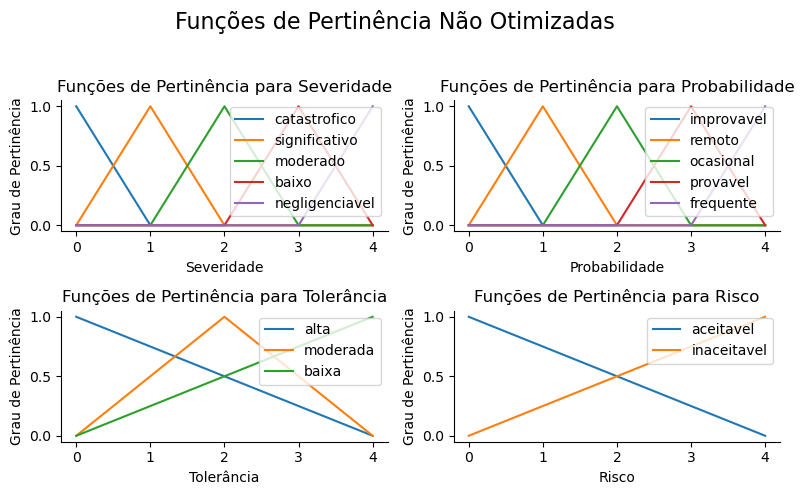

In [10]:
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import numpy as np
import pandas as pd
from skfuzzy.defuzzify import defuzz
from pyswarms.single import GeneralOptimizerPSO
import pyswarms.backend.topology as topo  # You can choose other topologies
from joblib import Parallel, delayed
import os

SEVERIDADE = "severidade"
PROBABIBILIDADE = "probabilidade"
TOLERANCIA = "tolerancia"
RISCO = "risco"

CODIGOS_SEVERIDADE = ["catastrofico", "significativo", "moderado", "baixo", "negligenciavel"]
CODIGOS_PROBABILIDADE = ["improvavel", "remoto", "ocasional", "provavel", "frequente"]
CODIGOS_TOLERANCIA = ["alta", "moderada", "baixa"]
CODIGOS_RISCO = ["aceitavel", "inaceitavel"]

ROTULOS_TOLERANCIA = ["Alta", "Moderada", "Baixa"]
ROTULOS_SEVERIDADE = ["Catastrófico", "Significativo", "Moderado", "Baixo", "Negligenciável"]
ROTULOS_PROBABILIDADE = ["Improvável", "Remoto", "Ocasional", "Provável", "Frequente"]
ROTULOS_RISCO = ["Aceitável", "Inaceitável"]


# Gerando universos
x_sev = np.arange(0, 5, 1)
x_prob = np.arange(0, 5, 1)
x_tol = np.arange(0, 5, 1)
x_risc = np.arange(0, 5, 1)

# Gerando funções de pertinência
# ABC para cada função de pertinencia
sev_abc = [
    [0, 0, 1],  # negligenciavel
    [0, 1, 2],  # baixo
    [1, 2, 3],  # moderado
    [2, 3, 4],  # significativo
    [3, 4, 4],  # catastrofico
]

prob_abc = [
    [0, 0, 1],  # improvavel
    [0, 1, 2],  # remoto
    [1, 2, 3],  # ocasional
    [2, 3, 4],  # provavel
    [3, 4, 4],  # frequente
]

tol_abc = [
    [0, 0, 4],  # alta
    [0, 2, 4],  # moderada
    [0, 4, 4],  # baixa
]

risc_abc = [
    [0, 0, 4],  # aceitavel
    [0, 4, 4],  # inaceitavel
]

# Funções de pertinência
fp_sev = {label: fuzz.trimf(x_sev, lista) for label, lista in zip(CODIGOS_SEVERIDADE, sev_abc)}
fp_prob = {label: fuzz.trimf(x_prob, lista) for label, lista in zip(CODIGOS_PROBABILIDADE, prob_abc)}
fp_tol = {label: fuzz.trimf(x_tol, lista) for label, lista in zip(CODIGOS_TOLERANCIA, tol_abc)}
fp_risc = {label: fuzz.trimf(x_risc, lista) for label, lista in zip(CODIGOS_RISCO, risc_abc)}

# Lista de universos e funções de pertinência
universes = [
    (x_sev, fp_sev, "Severidade", SEVERIDADE),
    (x_prob, fp_prob, "Probabilidade", PROBABIBILIDADE),
    (x_tol, fp_tol, "Tolerância", TOLERANCIA),
    (x_risc, fp_risc, "Risco", RISCO),
]

def mostrar_funcoes_pertinencia():
    # Criando subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 5))

    # Plotando as funções de pertinência
    for i, (x, fp, title, codigo) in enumerate(universes):
        ax = axs[i // 2, i % 2]
        for label, mf in fp.items():
            ax.plot(x, mf, label=label)
        ax.set_title(f"Funções de Pertinência para {title}")
        ax.set_xlabel(title)
        ax.set_ylabel("Grau de Pertinência")
        ax.legend()
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    fig.suptitle("Funções de Pertinência Não Otimizadas", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

mostrar_funcoes_pertinencia()

In [11]:
def calcular_centroide(severidade, probabilidade, tolerancia=None):
    intersecao = fuzz.fuzzy_and(x_sev, fp_sev[severidade], x_prob, fp_prob[probabilidade])
    if tolerancia:
        intersecao = fuzz.fuzzy_and(*intersecao, x_tol, fp_tol[tolerancia])

    return intersecao, defuzz(*intersecao, "centroid")


def calcular_risco_sem_regras(severidade, probabilidade, tolerancia=None, plotar=False):
    uniao, centroide = calcular_centroide(severidade, probabilidade, tolerancia)

    p_aceitavel = fuzz.interp_membership(x_risc, fp_risc["aceitavel"], centroide)
    p_inaceitavel = fuzz.interp_membership(x_risc, fp_risc["inaceitavel"], centroide)
    resultado = "Aceitável" if p_aceitavel >= p_inaceitavel else "Inaceitável"

    if plotar:
        print(severidade, probabilidade, f"{resultado} - {centroide:.2f}")
        plt.plot(*uniao)
        plt.title(f"Centroide: {centroide:.2f} - Risco: {resultado}")
        plt.plot(centroide, 0, "ro")
        plt.show()

    return resultado


def gerar_matriz_de_risco_sem_regras(tolerancia=None):
    # Criar matriz vazia
    matrix = []

    # Calcular risco para cada combinação
    for sev in CODIGOS_SEVERIDADE:
        row = []
        for prob in CODIGOS_PROBABILIDADE:
            result = calcular_risco_sem_regras(sev, prob, tolerancia)

            row.append(result)
        matrix.append(row)

    # Criar DataFrame
    df = pd.DataFrame(matrix, index=ROTULOS_SEVERIDADE, columns=ROTULOS_PROBABILIDADE)

    return df.style.map(
        lambda val: (
            "background-color: blue"
            if val == "Aceitável"
            else "background-color: orange" if val == "Inaceitável" else "background-color: red"
        )
    )


def atualizar_funcoes_de_pertinencia(params, tam_param, com_tol=False):
    for i, label in enumerate(CODIGOS_SEVERIDADE):
        sev_param = np.sort(params[i * tam_param : (i + 1) * tam_param])
        fp_sev[label] = fuzz.trapmf(x_sev, sev_param)

    for i, label in enumerate(CODIGOS_PROBABILIDADE):
        prob_param = np.sort(params[5 * tam_param + i * tam_param : 5 * tam_param + (i + 1) * tam_param])
        fp_prob[label] = fuzz.trapmf(x_prob, prob_param)

    if com_tol:
        for i, label in enumerate(CODIGOS_TOLERANCIA):
            tol_param = np.sort(params[10 * tam_param + i * tam_param : 10 * tam_param + (i + 1) * tam_param])
            fp_tol[label] = fuzz.trapmf(x_tol, tol_param)
        offset = 13 * tam_param
    else:
        offset = 10 * tam_param

    for i, label in enumerate(CODIGOS_RISCO):
        risc_param = np.sort(params[offset + i * tam_param : offset + (i + 1) * tam_param])
        fp_risc[label] = fuzz.trapmf(x_risc, risc_param)

def mostra_matriz_sem_tol_com_parametros_otimizados(params_otimizados):
    atualizar_funcoes_de_pertinencia(params_otimizados, 4)
    display(gerar_matriz_de_risco_sem_regras())


def mostrar_matrizes_com_parametros_otimizados(params_otimizados):
    # Definindo as funcoes de pertinencia otimizadas
    atualizar_funcoes_de_pertinencia(params_otimizados, 4)

    for tol in ROTULOS_TOLERANCIA:
        print(f"Matriz de Risco - Tolerancia {tol}")
        display(gerar_matriz_de_risco_sem_regras(tol.lower()))

### Modelo sem input de tolerância e sem regras

In [12]:
def funcao_custo(params):
    custos = []
    for param in params:
        # Atualizar funções de pertinência com os parâmetros otimizados
        try:
            atualizar_funcoes_de_pertinencia(param, 4)

            # Gerar matrizes de risco para diferentes tolerâncias
            matriz_com_regras = matrizes_com_regras["moderada"].data
            matriz_sem_regras = gerar_matriz_de_risco_sem_regras().data

            # Calcular a diferença entre as matrizes
            diferenca = np.sum(matriz_com_regras.values != matriz_sem_regras.values)

            custos.append(diferenca)
        except Exception as e:
            custos.append(1e10)
            continue

    return np.array(custos)


def funcao_custo_paralela(positions):
    costs = Parallel(n_jobs=os.cpu_count())(
        delayed(funcao_custo)(positions[i : i + 1]) for i in range(len(positions))
    )
    return np.array(costs).flatten()


# Executar PSO
# # Definir posições iniciais das partículas com base nas definições iniciais dos dicts de funções de pertinência
n_particulas = 1000
tam_param = 4
n_funcoes = 12
dimensoes = n_funcoes * tam_param

# # Configurar o otimizador PSO com as posições iniciais
optimizer = GeneralOptimizerPSO(
    topology=topo.Ring(),
    n_particles=n_particulas,
    dimensions=dimensoes,
    options={"c1": 1, "c2": 2, "w": 0.9, "k": 2, "p": 2, "r": 1},
    bounds=([0, 0, 0, 0] * n_funcoes, [4, 4, 4, 4] * n_funcoes),
    # init_pos=initial_positions,
    velocity_clamp=(0.05, 1),
)

melhor_custo, params_otimizados = optimizer.optimize(funcao_custo_paralela, iters=200)

2025-02-20 09:42:58,575 - pyswarms.single.general_optimizer - INFO - Optimize for 200 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 2, 'p': 2, 'r': 1}
pyswarms.single.general_optimizer: 100%|██████████|200/200, best_cost=1
2025-02-20 09:47:08,492 - pyswarms.single.general_optimizer - INFO - Optimization finished | best cost: 1.0, best pos: [1.0462104  3.19017732 3.68037562 3.88402446 1.0358393  3.3400735
 3.40958542 0.05727101 0.46326931 2.01994571 3.58442283 0.24039577
 3.31296784 3.16355351 2.58074484 3.5967732  2.14614603 3.76794053
 3.93376012 3.77858187 2.02404547 3.31090434 3.80557055 3.9408137
 3.9463157  3.65755527 0.03579696 2.04292516 3.1436147  3.24531202
 2.47494069 0.05887456 3.78155103 3.60432408 3.01831242 0.00474124
 2.06504343 3.70435409 0.06184888 2.04990165 2.65108507 3.68594776
 1.40859817 3.97415279 0.40621503 3.73627182 0.01859039 3.9752959 ]


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Significativo,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Moderado,Aceitável,Inaceitável,Inaceitável,Inaceitável,Inaceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


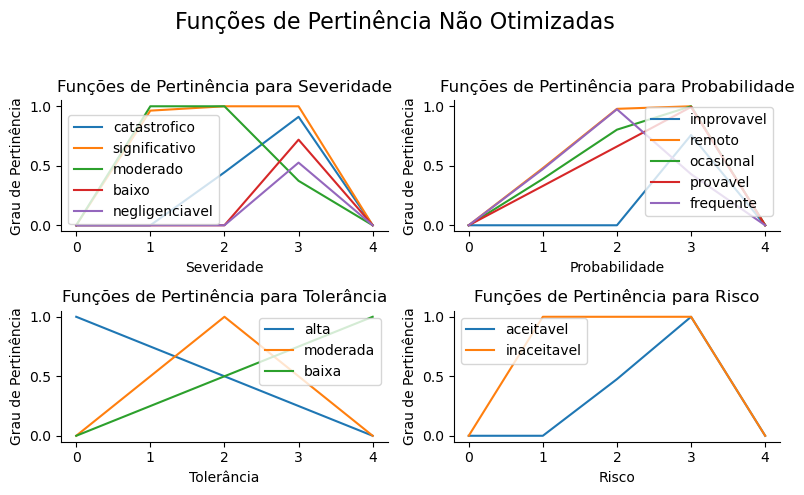

In [13]:
mostra_matriz_sem_tol_com_parametros_otimizados(params_otimizados)
mostrar_funcoes_pertinencia()

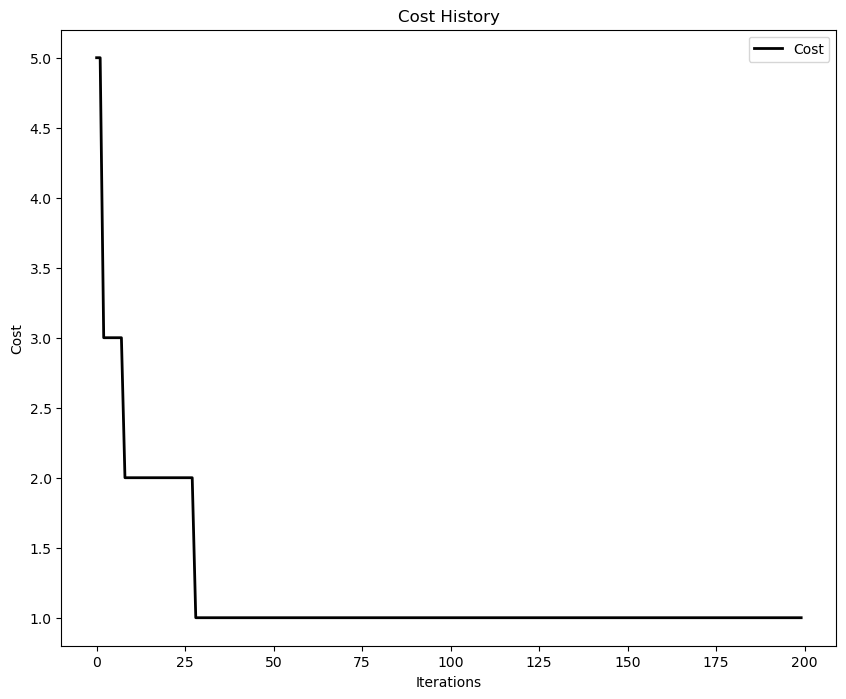

In [14]:
from pyswarms.utils.plotters import plot_cost_history

plot_cost_history(cost_history=optimizer.cost_history);

### Modelo com input de tolerância e sem regras

In [15]:
# Função de custo para comparar as matrizes de risco
def funcao_custo(params):
    custos = []
    for param in params:
        # Atualizar funções de pertinência com os parâmetros otimizados

        try:
            atualizar_funcoes_de_pertinencia(param, 4, com_tol=True)

            # Gerar matrizes de risco para diferentes tolerâncias
            diferenca_total = 0
            for tol in CODIGOS_TOLERANCIA:
                matriz_com_regras = matrizes_com_regras[tol].data
                matriz_sem_regras = gerar_matriz_de_risco_sem_regras(tol).data

                # Calcular a diferença entre as matrizes
                diferenca = np.sum(matriz_com_regras.values != matriz_sem_regras.values)
                diferenca_total += diferenca

            custos.append(diferenca_total)
        except Exception as e:
            custos.append(1e10)
            continue

    return np.array(custos)


def funcao_custo_paralela(positions):
    costs = Parallel(n_jobs=os.cpu_count())(delayed(funcao_custo)(positions[i : i + 1]) for i in range(len(positions)))
    return np.array(costs).flatten()


# Definir limites para os parâmetros

n_particulas = 1000
tam_param = 4
n_funcoes = 15
dimensoes = n_funcoes * tam_param
lb = [0, 0, 0, 0] * n_funcoes
ub = [4, 4, 4, 4] * n_funcoes

# Executar PSO
# # Definir posições iniciais das partículas com base nas definições iniciais dos dicts de funções de pertinência
n_particulas = 1000

initial_positions = np.tile(np.array([[0, 1, 3, 4]] * 15, dtype=np.float64).flatten(), (n_particulas, 1)).reshape(
    n_particulas, dimensoes
)

# # Configurar o otimizador PSO com as posições iniciais
optimizer = GeneralOptimizerPSO(
    topology=topo.Ring(),
    n_particles=n_particulas,
    dimensions=dimensoes,
    options={"c1": 1, "c2": 2, "w": 0.9, "k": 2, "p": 2, "r": 1},
    bounds=(lb, ub),
    init_pos=initial_positions,
    velocity_clamp=(0.05, 1),
)

# # Executar o otimizador
best_cost, params_otimizados = optimizer.optimize(funcao_custo_paralela, iters=150)

2025-02-20 09:47:09,139 - pyswarms.single.general_optimizer - INFO - Optimize for 150 iters with {'c1': 1, 'c2': 2, 'w': 0.9, 'k': 2, 'p': 2, 'r': 1}
pyswarms.single.general_optimizer:  54%|█████▍    |81/150, best_cost=10


KeyboardInterrupt: 

In [ ]:
from pyswarms.utils.plotters import plot_cost_history

ax = plt.figure(figsize=(5, 3))
plot_cost_history(ax=ax, cost_history=optimizer.cost_history)

AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 500x300 with 0 Axes>

Matriz de Risco - Tolerancia Alta


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Inaceitável,Inaceitável,Inaceitável,Aceitável
Significativo,Aceitável,Inaceitável,Inaceitável,Inaceitável,Aceitável
Moderado,Aceitável,Inaceitável,Inaceitável,Inaceitável,Aceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


Matriz de Risco - Tolerancia Moderada


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Aceitável,Inaceitável,Inaceitável,Aceitável
Significativo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Moderado,Aceitável,Aceitável,Inaceitável,Inaceitável,Aceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


Matriz de Risco - Tolerancia Baixa


,Improvável,Remoto,Ocasional,Provável,Frequente
Catastrófico,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Significativo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Moderado,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Baixo,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável
Negligenciável,Aceitável,Aceitável,Aceitável,Aceitável,Aceitável


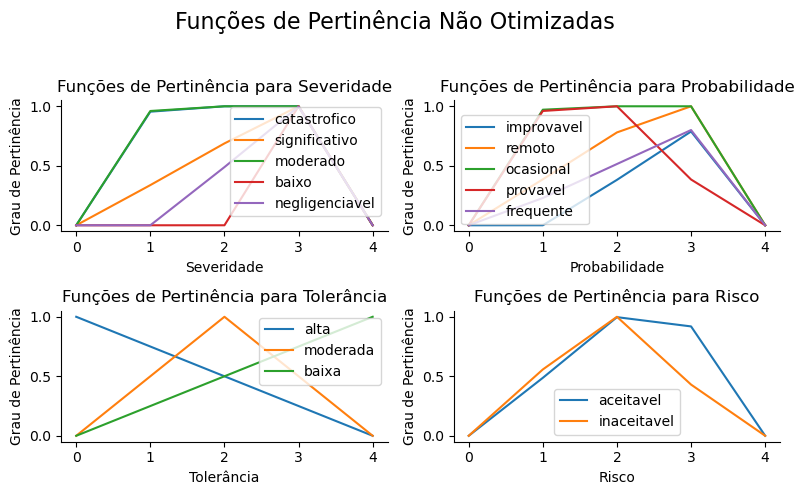

In [ ]:
mostrar_matrizes_com_parametros_otimizados(params_otimizados)
mostrar_funcoes_pertinencia()